Samuel García Berenfeld
A01642317

# Ejercicio 1

Evalúa con validación cruzada un modelo perceptrón multicapa para las variables que se te asignaron para este ejercicio.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, make_scorer
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

Mejores hiperparámetros: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}
MSE: 10.702491451075181
MAE: 2.316513285245414
R²: 0.9049631720107086


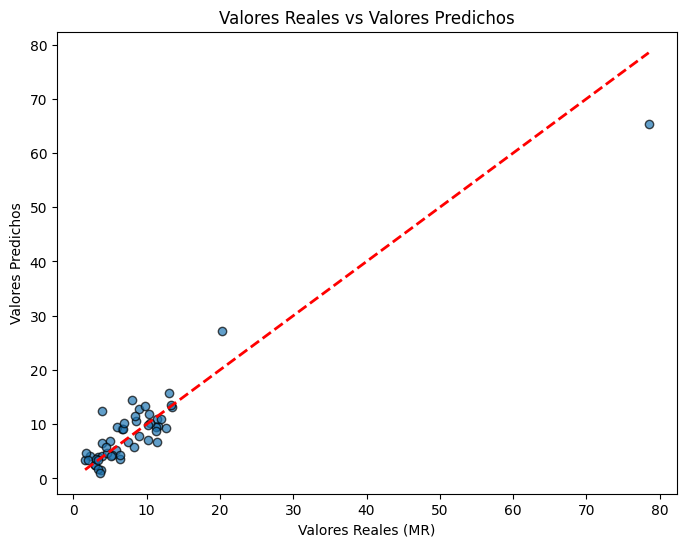

In [ ]:
data = pd.read_csv('/content/sample_data/crime_data.csv')

X = data[['M', 'H', 'S', 'P']]

y = data['MR']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=10000, random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

y_pred = cross_val_predict(best_model, X, y, cv=5)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reales (MR)')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.show()


1. **¿Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?**

  El modelo es efectivo al predecir valores utilizando su entrenamiento, algo que se puede observar en la gráfica de datos. Al observar el valor de R^2 nos damos cuenta que el modelo es efectivo pero quizás podría ser un poco mejor explicando los datos, algo que quizás se podría lograr incorporando los datos que no se utilizaron por la asignatura.
2. **¿Qué modelo es mejor para los datos de criminalidad, el lineal o el perceptrón multicapa? ¿Por qué?**

  Al observar la distribución de los datos nos damos cuenta de que quizás un modelo lineal sería mejor para esta aplicación, ya que se conformaría también adecuadamente a los datos.


# Ejercicio 2

In [3]:
data = pd.read_csv('/content/sample_data/M_1.txt', sep='\t', header=None)

y = df.iloc[:, 0]
X = df.iloc[:, 2:-1]

Evalúa un modelo perceptrón multicapa con validación cruzada utilizando al menos 5 capas de 20 neuronas.

In [5]:
pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=1000, random_state=42)
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f"Accuracy en cada fold: {scores}")

print(f"Media de accuracy: {scores.mean():.4f}")

Accuracy en cada fold: [0.92857143 0.96825397 0.92857143 0.91269841 0.96825397]
Media de accuracy: 0.9413


Evalúa un modelo perceptrón multicapa con validación cruzada, pero encontrando
el número óptimo de capas y neuronas de la red.

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [
        (20,),
        (20, 20),
        (20, 20, 20),
        (20, 20, 20, 20),
        (20, 20, 20, 20, 20)
    ]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

print(f"Mejor número de capas y neuronas: {grid_search.best_params_['mlp__hidden_layer_sizes']}")
print(f"Mejor precisión (accuracy): {grid_search.best_score_:.4f}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejor número de capas y neuronas: (20, 20, 20)
Mejor precisión (accuracy): 0.9651


1. **¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? Argumenta tu respuesta.**

  Podemos observar una suerte de lo que llaman diminishing returns en inglés, ya que al complicar demasiado la red neuronal en un modelo sencillo comenzamos a ver caídas en la exactitud. Es muy aparente que hacer a la red más compleja inicialmente si tiene un efecto positivo, como podemos ver claramente. En general, creo que es necesario atender la complejidad de la red con gentileza.
2. **¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?**

  El mayor problema durante este procedimiento se asocia con el poder computacional, ya que computar el resultado óptimo requiere hacer muchas pruebas con diferentes tamaños y capas de redes neuronales, lo que puede tomar mucho tiempo. En general, es bueno tener una idea del tamaño de red aproximado óptimo para el problema a solucionar, con el fin de probar instancias inteligentes.

# Ejercicio 3

In [8]:
df = pd.read_csv('/content/sample_data/P1_4.txt', sep='\t', header=None)

y = df.iloc[:, 0]
X = df.iloc[:, 2:-1]

Implementa un modelo perceptrón de una neurona entrenado con descenso de gradiente estocástico, y evalúalo con validación cruzada. Para esta caso, es necesario que encuentres la gráfica de Época Vs Exactitud.


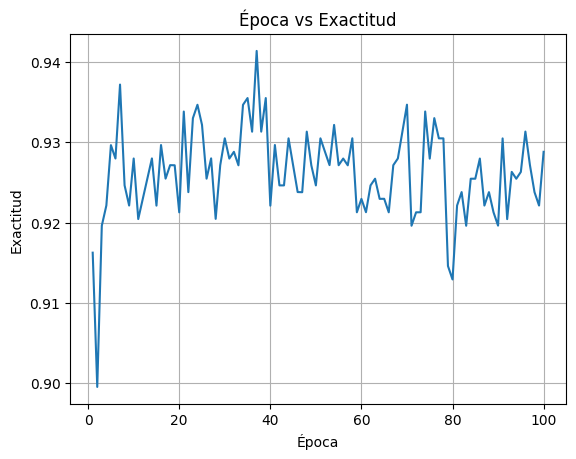

In [11]:
sgd = SGDClassifier(loss='perceptron', max_iter=1, tol=None, random_state=42, learning_rate='constant', eta0=0.01)

pipeline = make_pipeline(StandardScaler(), sgd)

n_epochs = 100
accuracies = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for epoch in range(1, n_epochs + 1):
    pipeline.named_steps['sgdclassifier'].max_iter = epoch
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    accuracies.append(scores.mean())

plt.plot(range(1, n_epochs + 1), accuracies)
plt.title('Época vs Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.grid(True)
plt.show()


Repite el paso anterior, pero utilizando descenso de gradiente de lote y de mini-lote para entrenar el modelo.


In [18]:
df = pd.read_csv('/content/sample_data/P1_4.txt', sep='\t', header=None)

y = df.iloc[:, 0].values
X = df.iloc[:, 2:-1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_perceptron_model(input_dim, learning_rate):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(X, y, learning_rate, batch_size):
    accuracies = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        input_dim = X_train.shape[1]
        model = create_perceptron_model(input_dim, learning_rate)
        model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0)

        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"Fold {fold} - Exactitud: {accuracy:.4f}")

    return np.mean(accuracies)

batch_size = X_scaled.shape[0]
print("=== Evaluación con descenso de gradiente en lote ===")
accuracy_batch = evaluate_model(X_scaled, y, learning_rate=0.001, batch_size=batch_size)
print(f"\nExactitud media en lote completo: {accuracy_batch:.4f}")

print("\n=== Evaluación con descenso de gradiente en mini-lote ===")
accuracy_mini_batch = evaluate_model(X_scaled, y, learning_rate=0.001, batch_size=10)
print(f"\nExactitud media en mini-lote: {accuracy_mini_batch:.4f}")


=== Evaluación con descenso de gradiente en lote ===
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold 1 - Exactitud: 0.1464
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Fold 2 - Exactitud: 0.0711
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold 3 - Exactitud: 0.0460
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Fold 4 - Exactitud: 0.1423
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold 5 - Exactitud: 0.0630

Exactitud media en lote completo: 0.0938

=== Evaluación con descenso de gradiente en mini-lote ===
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Fold 1 - Exactitud: 0.0921
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold 2 - Exactitud: 0.2385
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 3 - Exactitud: 0.0460
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Fold 4 - Exactitud: 0.0711
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold 5 - Exactitud: 0.0462

Exactitud media en mini-lote: 0.0988


Evalúa un modelo perceptrón multicapa con validación cruzada. Para este caso, puedes utilizar un modelo dado por scikit-learn, Keras o Pytorch.


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(6, 6, 6), activation='relu', solver='adam', max_iter=1000, random_state=42)

scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

for fold, score in enumerate(scores, 1):
    print(f"Fold {fold} - Exactitud: {score:.4f}")

print("\nExactitud media con validación cruzada: {:.4f}".format(np.mean(scores)))



Fold 1 - Exactitud: 0.9289
Fold 2 - Exactitud: 0.9414
Fold 3 - Exactitud: 0.9456
Fold 4 - Exactitud: 0.9414
Fold 5 - Exactitud: 0.9622

Exactitud media con validación cruzada: 0.9439


1. **¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?**

  Es muy obvio a simple vista que la respuesta a esta pregunta es no. La exactitud media alcanzada al utilizar una sola neurona es muy baja comparada con la del modelo multi capa. Es apreciable lo que mencionábamos anteriormente, que se deben experimentar diferentes tamaños de red hasta encontrar el que mejor predice los datos.